In [1]:
import pandas as pd
import numpy as np

import pyaf.ForecastEngine as autof
import pyaf.Bench.TS_datasets as tsds

%matplotlib inline  

In [2]:
cac40_symbol = "^FCHI"
b = tsds.load_yahoo_stock_price(cac40_symbol)
df = b.mPastData

In [3]:
df.sample(4)

,^FCHI,Date
1261,4394.189941,2016-09-19
755,4394.750000,2014-09-26
725,4174.359863,2014-08-15
351,3621.919922,2013-02-26


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1272 entries, 0 to 1271
Data columns (total 2 columns):
^FCHI    1272 non-null float64
Date     1272 non-null datetime64[ns]
dtypes: datetime64[ns](1), float64(1)
memory usage: 20.0 KB


In [5]:

lEngine = autof.cForecastEngine()
lEngine

H = 12;
# lEngine.mOptions.enable_slow_mode();
# lEngine.mOptions.mDebugPerformance = True;
lEngine.train(df , 'Date' , cac40_symbol, H);



START_TRAINING '^FCHI'
END_TRAINING_TIME_IN_SECONDS '^FCHI' 130.45096969604492


In [6]:
lEngine.getModelInfo();



TIME_DETAIL TimeVariable='Date' TimeMin=2011-10-13 00:00:00 TimeMax=2015-09-23 00:00:00 TimeDelta=1 days 10:20:36.941410 Estimation = (0 , 1008) Validation = (1008 , 1260) Test = (1260 , 1272) Horizon=12
SIGNAL_DETAIL SignalVariable='^FCHI' Min=2822.25 Max=5268.910156  Mean=4108.73979369 StdDev=570.595262855
BEST_TRANSOFORMATION_TYPE ''
BEST_DECOMPOSITION  '^FCHI_Lag1Trend_residue_zeroCycle_residue_NoAR' [Lag1Trend + NoCycle + NoAR]
TREND_DETAIL '^FCHI_Lag1Trend' [Lag1Trend]
CYCLE_DETAIL '^FCHI_Lag1Trend_residue_zeroCycle' [NoCycle]
AUTOREG_DETAIL '^FCHI_Lag1Trend_residue_zeroCycle_residue_NoAR' [NoAR]
MODEL_MAPE MAPE_Fit=0.0092 MAPE_Forecast=0.0105 MAPE_Test=0.0074
MODEL_L2 L2_Fit=49.1520508831 L2_Forecast=63.1551800536 L2_Test=45.0755022071
MODEL_COMPLEXITY  32
AR_MODEL_DETAIL_START
AR_MODEL_DETAIL_END


In [7]:
print(lEngine.mSignalDecomposition.mTrPerfDetails.head());



   Transformation                                              Model  \
18          ^FCHI  ^FCHI_Lag1Trend_residue_Seasonal_WeekOfYear_re...   
10          ^FCHI  ^FCHI_Lag1Trend_residue_bestCycle_byL2_residue...   
7           ^FCHI     ^FCHI_Lag1Trend_residue_zeroCycle_residue_NoAR   
0           ^FCHI  ^FCHI_Lag1Trend_residue_Seasonal_MonthOfYear_r...   
47          ^FCHI  ^FCHI_Lag1Trend_residue_Seasonal_DayOfWeek_res...   

    Complexity  FitCount      FitL2  FitMAPE  ForecastCount  ForecastL2  \
18          36      1008  48.063970   0.0091            252   62.586645   
10          40      1008  48.530861   0.0091            252   62.855634   
7           32      1008  49.152051   0.0092            252   63.155180   
0           36      1008  49.011000   0.0092            252   63.188013   
47          36      1008  49.017996   0.0092            252   63.366223   

    ForecastMAPE  TestCount     TestL2  TestMAPE  
18        0.0106         12  45.280305    0.0083  
10        0.01

In [8]:
lEngine.mSignalDecomposition.mBestModel.mTimeInfo.mResolution



4

/usr/lib/python3/dist-packages/matplotlib/__init__.py:1359: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


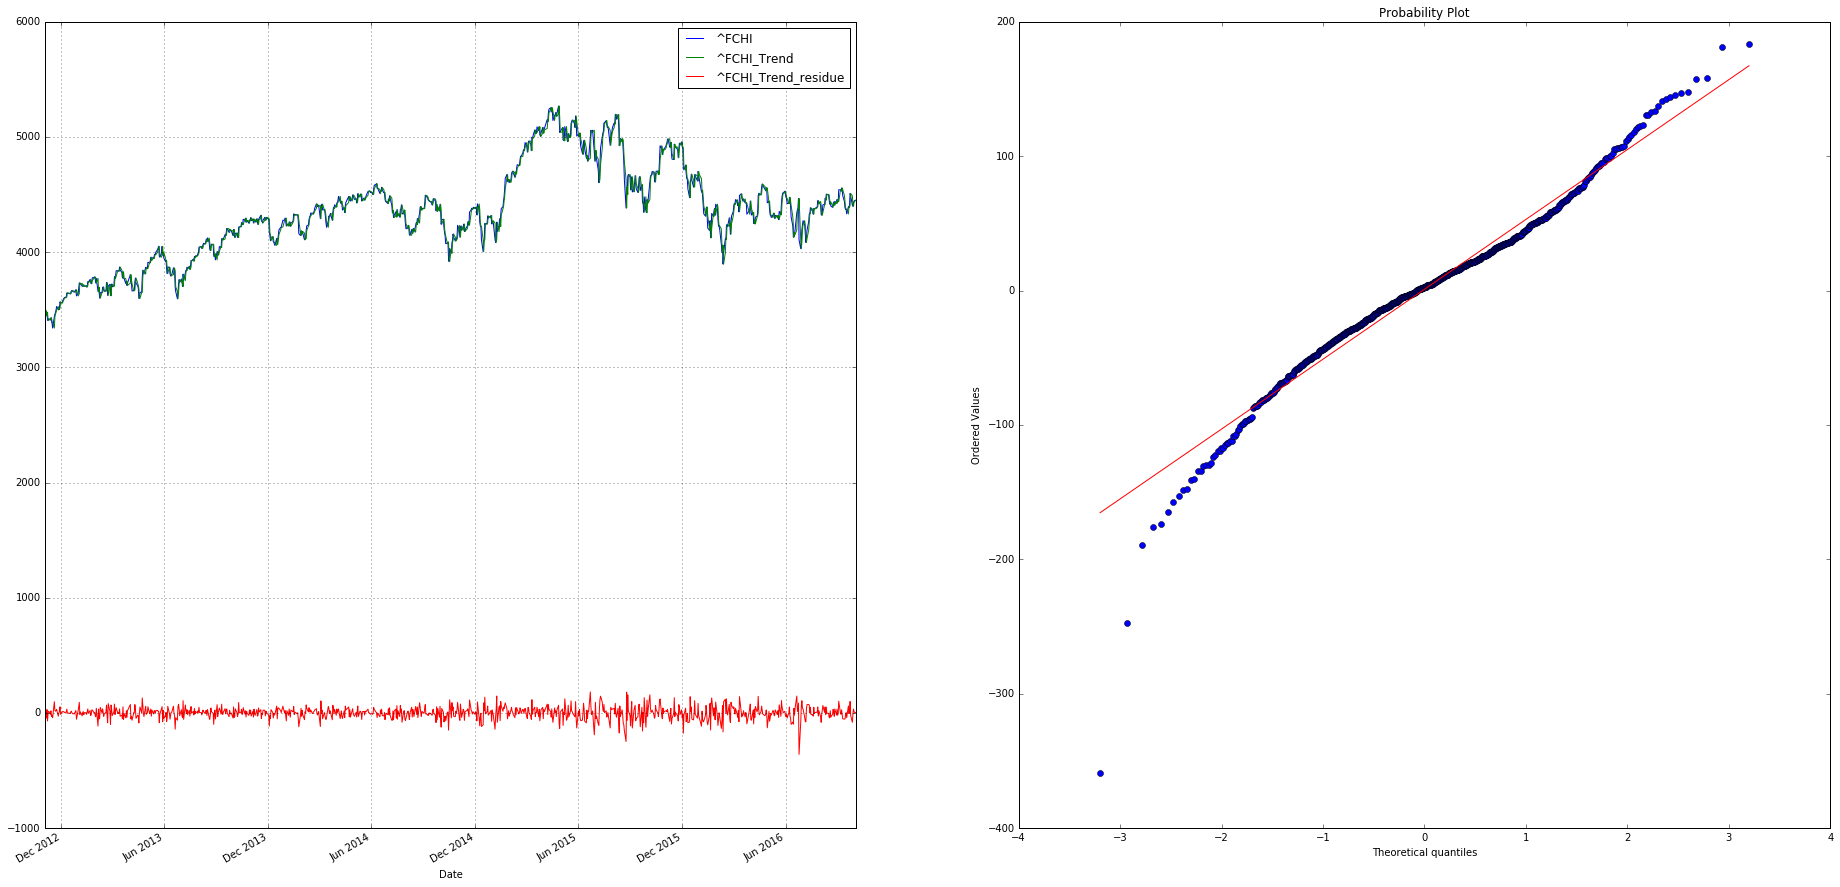

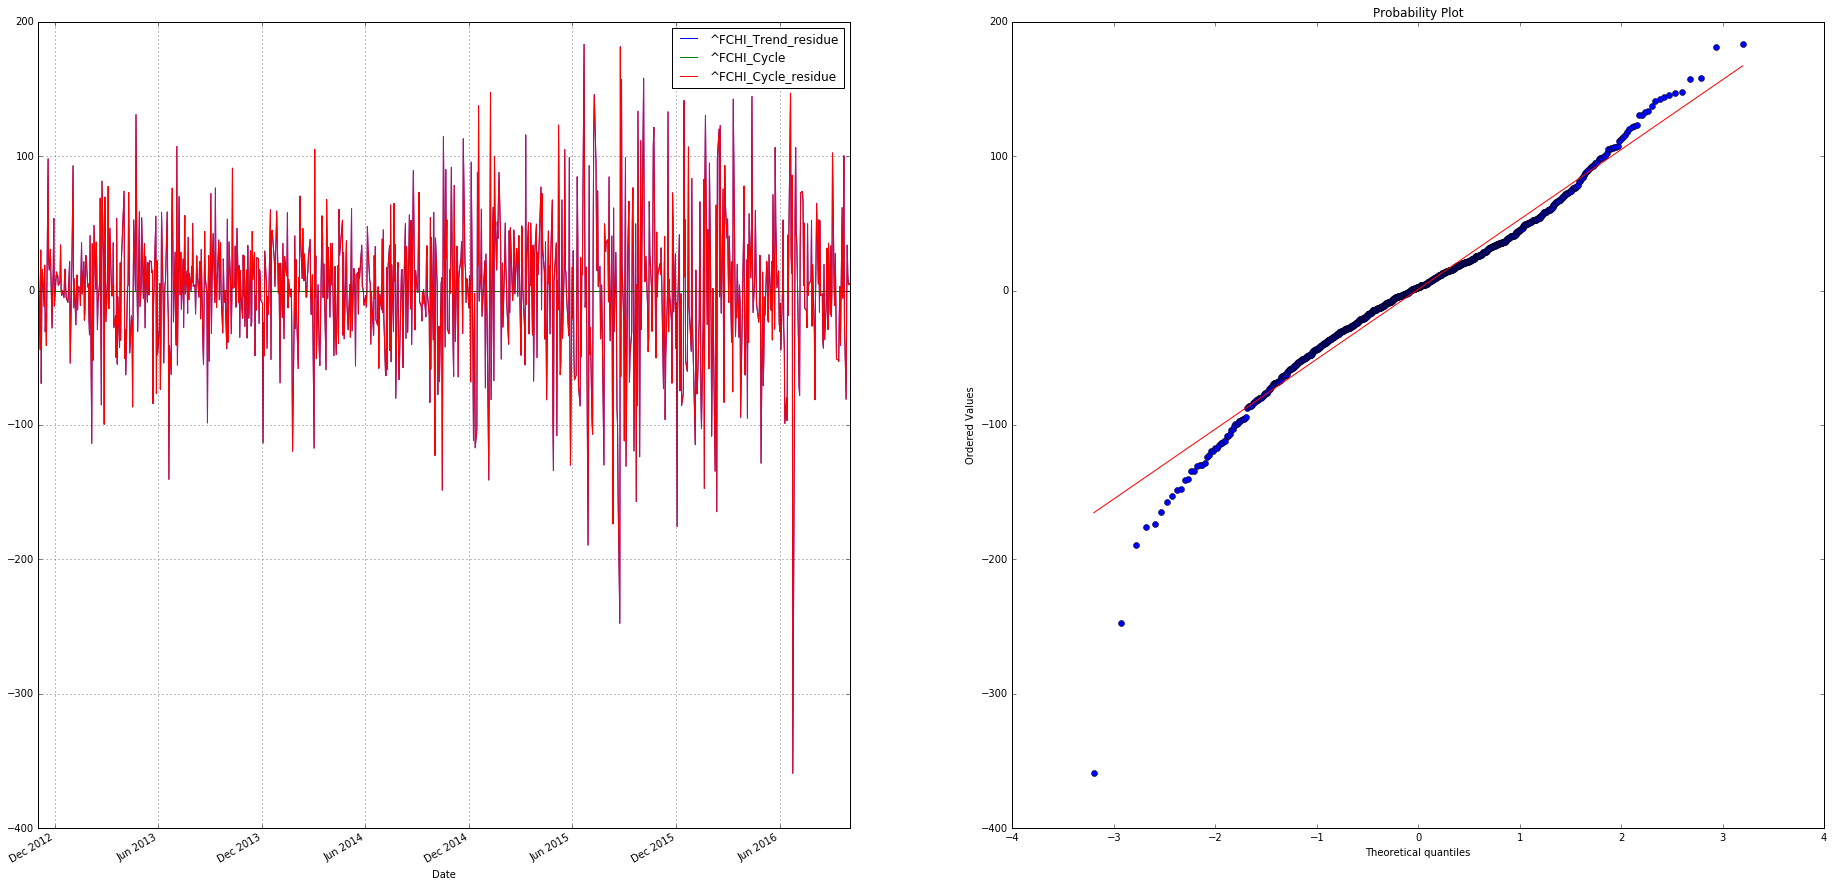

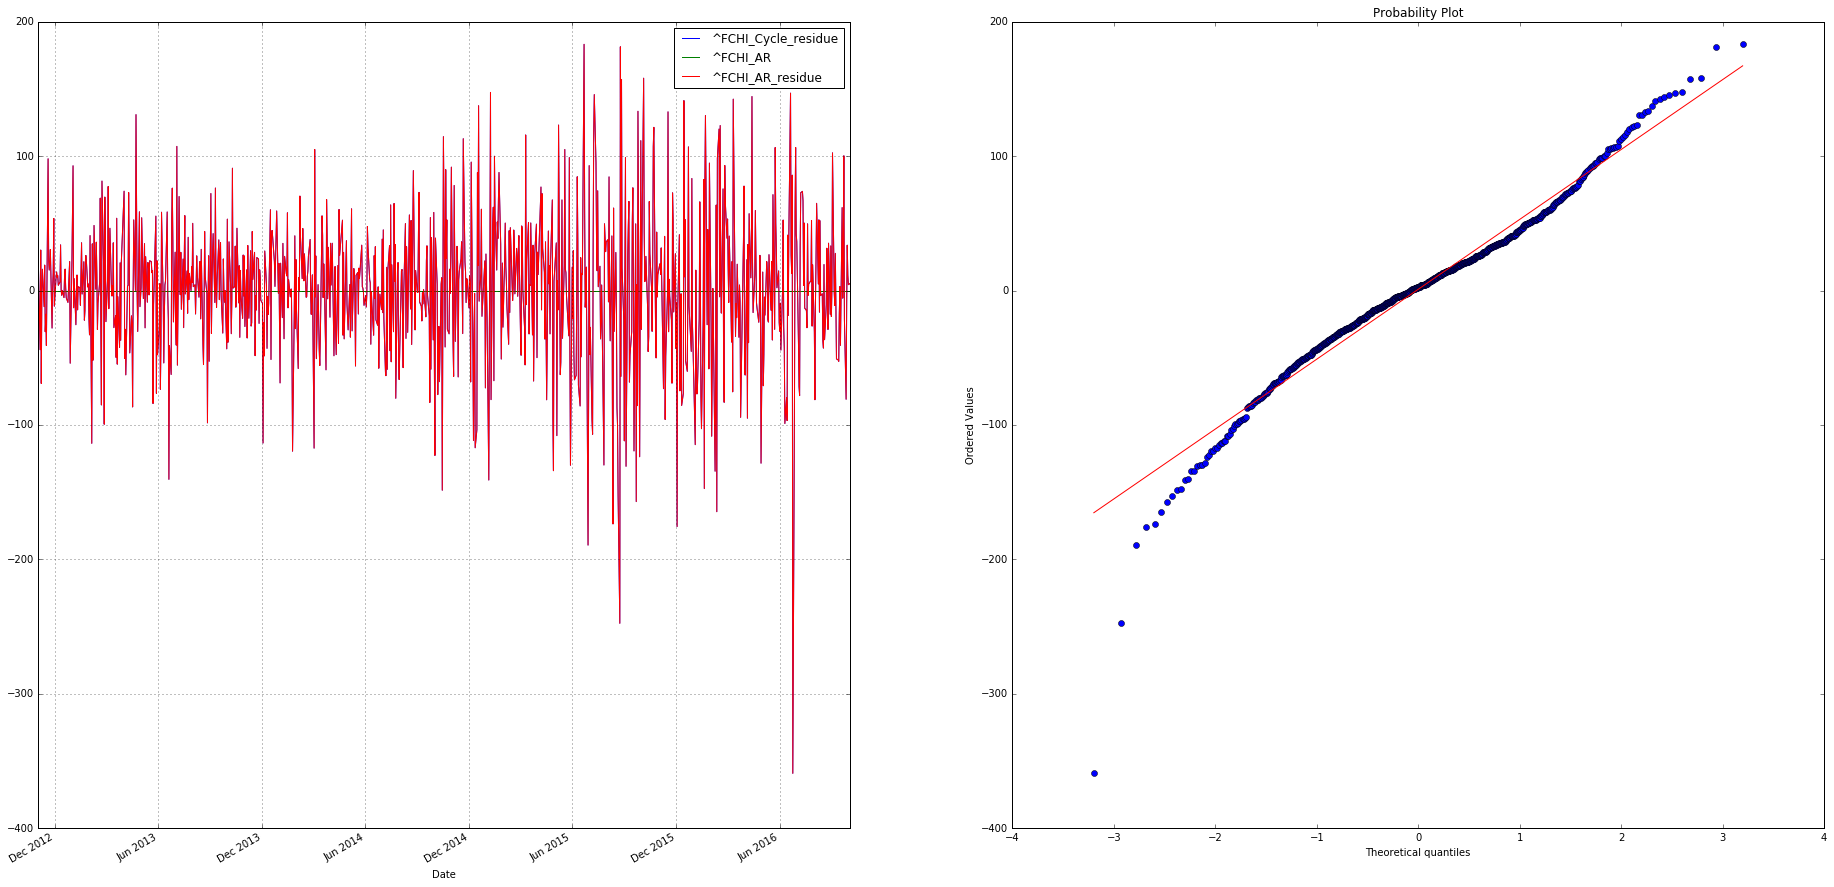

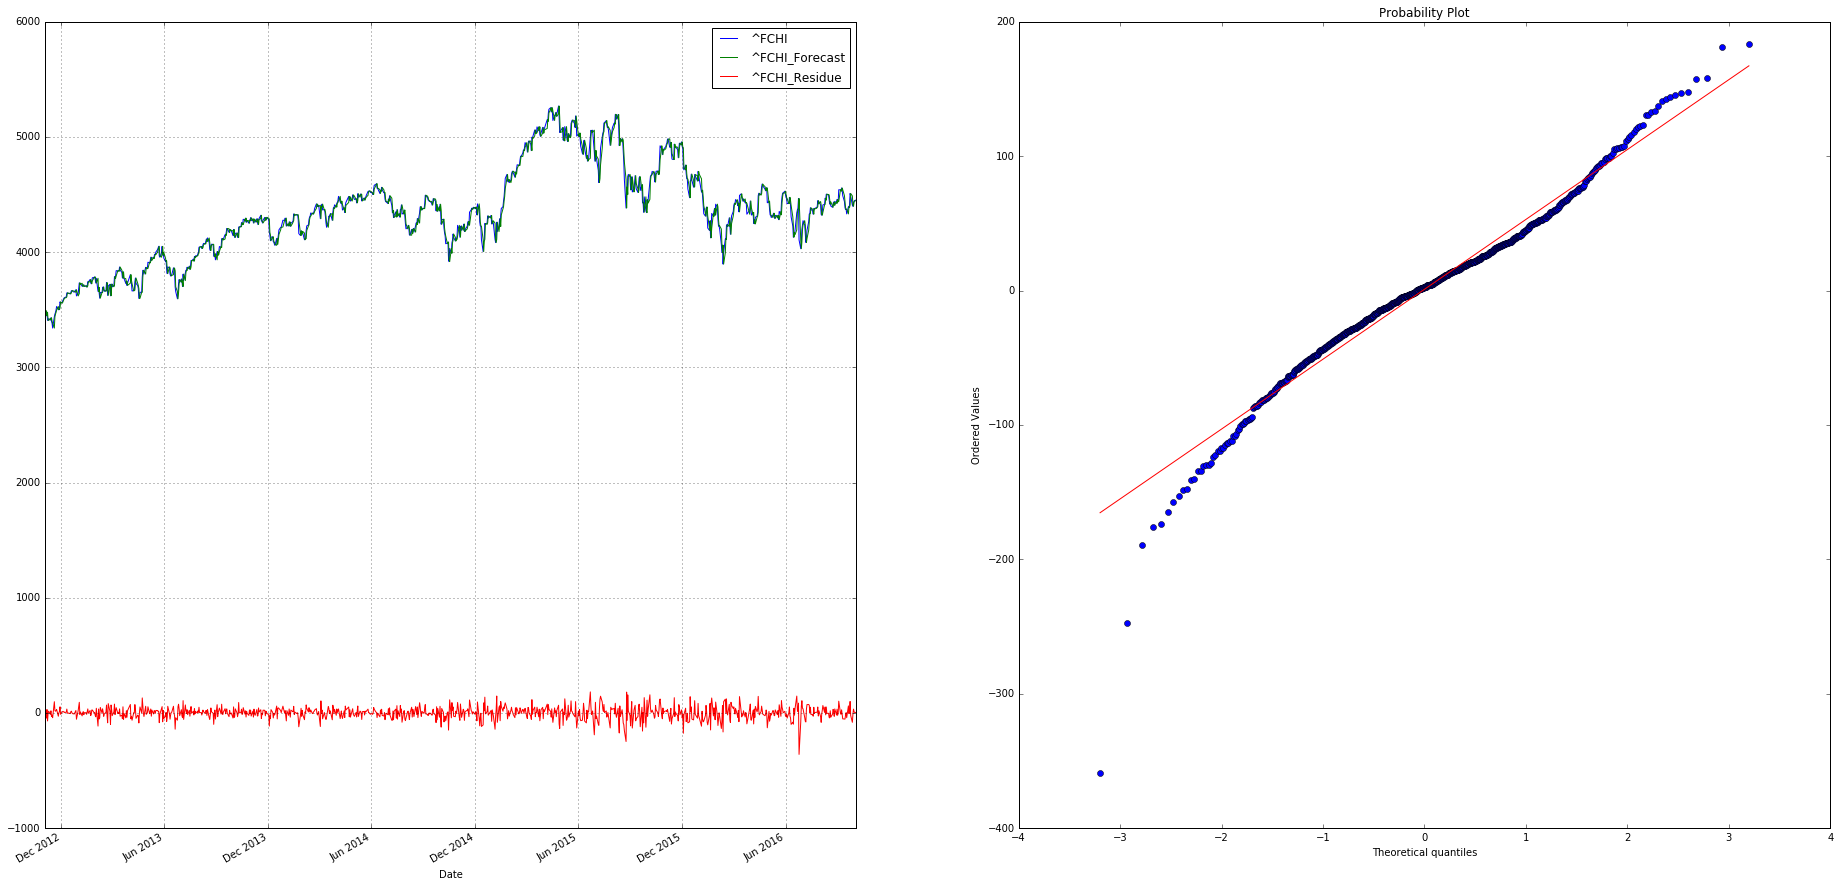

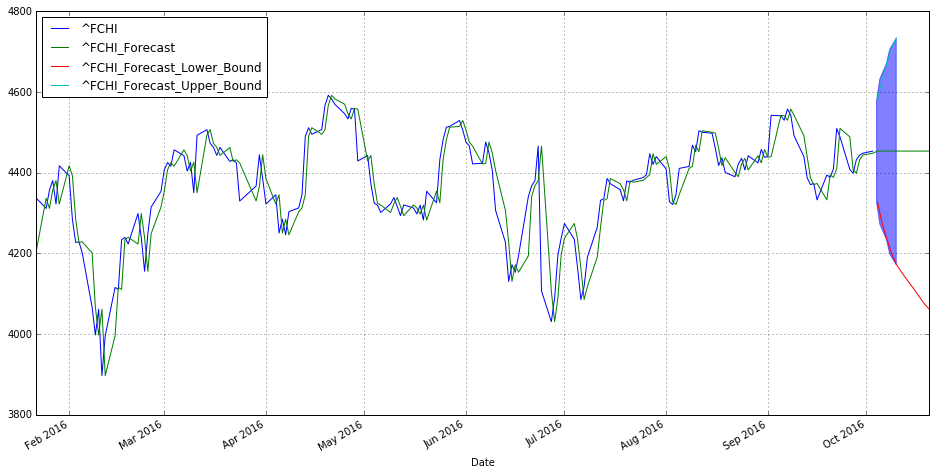

In [9]:
lEngine.standrdPlots();